<a href="https://colab.research.google.com/github/Talha1818/Audio-Classification-Neural-Network/blob/master/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install --upgrade librosa
# !pip install numba==0.48.0

In [ ]:
# !pip install --upgrade setuptools

In [ ]:
# !pip install resampy

In [ ]:
import os
import librosa
import numpy as np
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set the path to the audio folders
car_horn_folder = '/content/drive/MyDrive/Audio_datasets/Car_honk'
dog_bark_folder = '/content/drive/MyDrive/Audio_datasets/Dog_bark'

# Define a function to extract MFCC features from audio files
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

In [ ]:
# !pip install --upgrade numba

In [ ]:
# Extract features and labels from audio files
features = []
labels = []
for file_name in tqdm(os.listdir(car_horn_folder)):
    file_path = os.path.join(car_horn_folder, file_name)
    features.append(extract_features(file_path))
    labels.append('car_horn')
for file_name in tqdm(os.listdir(dog_bark_folder)):
    file_path = os.path.join(dog_bark_folder, file_name)
    features.append(extract_features(file_path))
    labels.append('dog_bark')

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/169 [00:00<?, ?it/s]

<ipython-input-1-74875560436f>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-74875560436f>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-1-74875560436f>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file

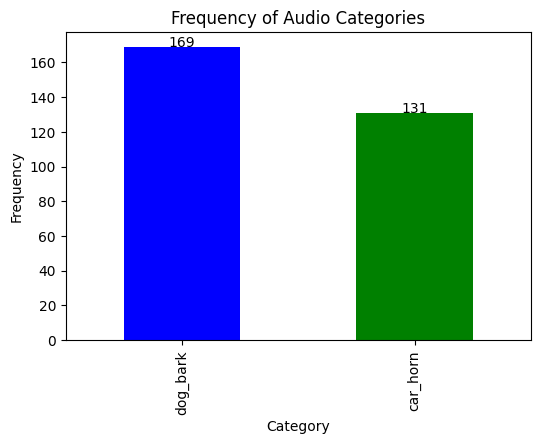

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# Create a pandas series from the labels list
label_counts = pd.Series(labels).value_counts()

# Define colors for each category
colors = ['blue', 'green']

# Create a barplot with different colors for each bar
ax = label_counts.plot(kind='bar', color=colors)

# Set the title and axis labels
ax.set_title('Frequency of Audio Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Frequency')

# Add count values to the bars
for i, v in enumerate(label_counts.values):
    ax.text(i, v, str(v), ha='center')

# Display the plot
plt.show()


In [ ]:
import random
random.seed(42)

In [ ]:
# Encode the labels as integers
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(features), labels_encoded, test_size=0.2, random_state=0)


In [ ]:
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (240, 40)
Testing Shape: (60, 40)


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               10496     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 17.9416 - accuracy: 0.5917 - val_loss: 8.9083 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 16.4331 - accuracy: 0.5167 - val_loss: 1.6834 - val_accuracy: 0.7500
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 11.5974 - accuracy: 0.6000 - val_loss: 1.6115 - val_accuracy: 0.8000
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 8.4304 - accuracy: 0.6375 - val_loss: 2.0601 - val_accuracy: 0.7833
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 10.5324 - accuracy: 0.5833 - val_loss: 0.3510 - val_accuracy: 0.9333
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 7.0237 - accuracy: 0.6708 - val_loss: 1.5490 - val_accuracy: 0.8000
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 4.9416 - accuracy: 0.7042 - val_loss: 0.8169 - val_accuracy: 0.8333
Epoch 8/50
8/8 [=============

In [ ]:
classes = le.classes_.tolist()

In [ ]:
def prediction(file):
  # Classify new audio files
  new_file_path = file
  new_features = extract_features(new_file_path)
  new_features = np.expand_dims(new_features, axis=0)
  prediction = model.predict(new_features, verbose=0)
  prediction_class = classes[int(np.round(prediction)[0][0])]
  print('Prediction:', prediction_class)

In [ ]:
# Classify new audio files
prediction("/content/drive/MyDrive/Audio_datasets/Car_honk/145577__bmoreno__0029-horn.wav")

Prediction: car_horn


In [ ]:
# Classify new audio files
prediction("/content/drive/MyDrive/Audio_datasets/Dog_bark/326563__bee09__dogs-barking-variation.wav")

Prediction: dog_bark
